## Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("UNR-IDD.csv")
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [4]:
data.shape

(37411, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

## Data Pre-processing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score 

In [10]:
labelencoder = LabelEncoder()

labelencoder.fit(data['Switch ID'])
data ['Switch ID'] = labelencoder.transform(data['Switch ID'])

labelencoder.fit(data['Port Number'])
data ['Port Number'] = labelencoder.transform(data['Port Number'])

labelencoder.fit(data['is_valid'])
data ['is_valid'] = labelencoder.transform(data['is_valid'])

labelencoder.fit(data['Binary Label'])
data ['Binary Label'] = labelencoder.transform(data['Binary Label'])

In [11]:
X = data.drop('Label',axis=1).values
y = data['Label'].values

In [12]:
print(X)
print(y)

[[    11      0    132 ...    688     -1      0]
 [    11      1    187 ...    688     -1      0]
 [    11      2    235 ...    688     -1      0]
 ...
 [     8      0   1042 ... 295404     -1      0]
 [     8      1 149012 ... 295404     -1      0]
 [     8      2    228 ... 295404     -1      0]]
['TCP-SYN' 'TCP-SYN' 'TCP-SYN' ... 'PortScan' 'PortScan' 'PortScan']


In [13]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state = 42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(22446, 33)
(14965, 33)
(22446,)
(14965,)


## Building the model

In [16]:
logisticRegression =  LogisticRegression(random_state = 0)
logisticRegression.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = logisticRegression.predict(X_test)

In [18]:
print (logisticRegression.score(X_train, y_train))
print (logisticRegression.score(X_test, y_test))

0.3400160384923817
0.3393250918810558


## Evaluating the performance of the model

In [19]:
print (classification_report(y_test, y_pred))
print (print("Validation Accuracy: ",accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

   Blackhole       0.29      0.20      0.24      3308
   Diversion       0.29      0.74      0.41      2261
      Normal       0.31      0.88      0.45      1493
    Overflow       0.00      0.00      0.00       399
    PortScan       0.57      0.12      0.20      3807
     TCP-SYN       0.57      0.26      0.35      3697

    accuracy                           0.34     14965
   macro avg       0.34      0.37      0.28     14965
weighted avg       0.42      0.34      0.30     14965

Validation Accuracy:  0.3393250918810558
None


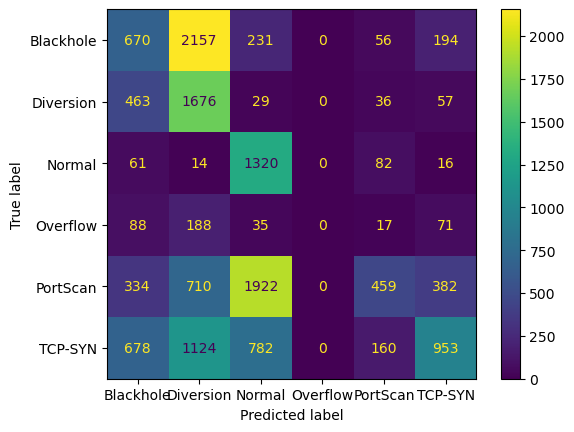

In [20]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegression.classes_)
disp.plot()
plt.show()